In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
# read data
df = tf.keras.datasets.mnist

In [ ]:
# split data into X and y
(X_train, y_train), (X_test, y_test) = df.load_data()
print('X Training shape: ',X_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',X_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


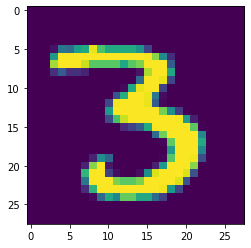

In [ ]:
# sample data
plt.imshow(X_train[12])
plt.show()

In [ ]:
input_shape = (28,28,1)

In [ ]:
# normalization
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 3

In [ ]:
# encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# define model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
# compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# train model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 31s 72ms/step - loss: 0.4656 - accuracy: 0.8537 - val_loss: 0.1037 - val_accuracy: 0.9732
Epoch 2/3
422/422 [==============================] - 30s 72ms/step - loss: 0.1527 - accuracy: 0.9534 - val_loss: 0.0711 - val_accuracy: 0.9817
Epoch 3/3
422/422 [==============================] - 31s 72ms/step - loss: 0.1189 - accuracy: 0.9638 - val_loss: 0.0567 - val_accuracy: 0.9842


Text(0, 0.5, 'Accuracy')

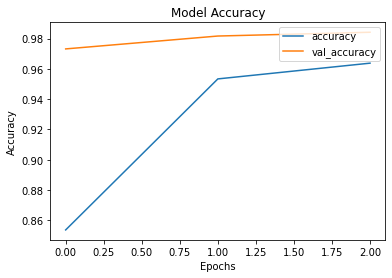

In [ ]:
# plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Model Accuracy")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

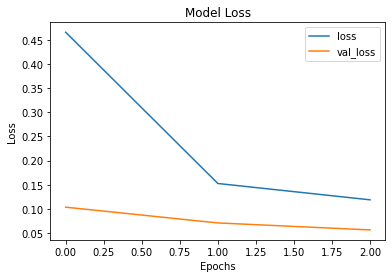

In [ ]:
# plot accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Model Loss")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")